In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\hp\Documents\Documents\Documents\TABLEAU\movies.csv')

In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing by calculating percentage of missing data
for col in df.columns:
    percentage_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percentage_missing*100)))
    

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
print(df.dtypes)


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [28]:
df.sort_values(by=['gross'],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,December
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,April 26
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,December
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,December
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,April 27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,October
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,February
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,April 27
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,October


In [32]:
#to display all the rows
pd.set_option('display.max_rows',None)

In [33]:
#drop duplicates
df['company'].drop_duplicates().sort_values(ascending=False)
#we can also use df.drop_duplicatess() it drops aanu duplicates present

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

Text(0, 0.5, 'gross')

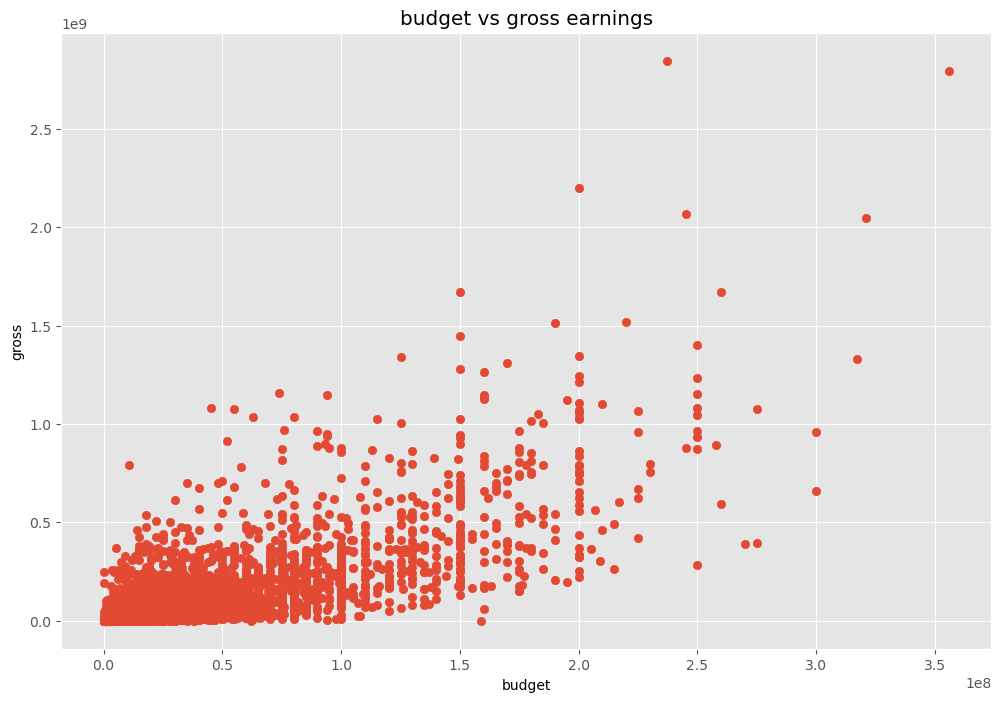

In [35]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('budget vs gross earnings')
plt.xlabel('budget')
plt.ylabel('gross')

<Axes: xlabel='budget', ylabel='gross'>

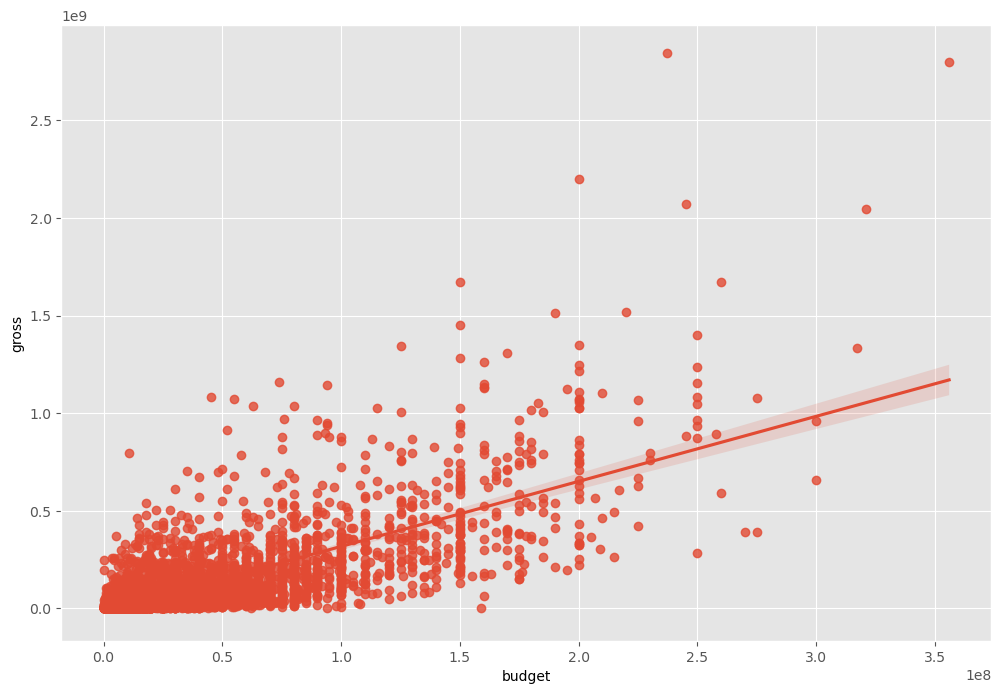

In [38]:
#budget and gross correlation
sns.regplot(x='budget',y='gross',data=df)

In [39]:
df.corr()  #works on numerical fields , default correlation is pearson correlation, other corrrelations are spearman and kendall

C:\Users\hp\AppData\Local\Temp\ipykernel_1180\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [40]:
df.corr(method='kendall')

C:\Users\hp\AppData\Local\Temp\ipykernel_1180\1723791258.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='kendall')


,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.224120,0.200618,0.097184
score,0.067652,1.000000,0.300115,-0.000566,0.086046,0.283611
votes,0.331465,0.300115,1.000000,0.353702,0.548899,0.198240
budget,0.224120,-0.000566,0.353702,1.000000,0.512637,0.235483
gross,0.200618,0.086046,0.548899,0.512637,1.000000,0.168933
runtime,0.097184,0.283611,0.198240,0.235483,0.168933,1.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_1180\1638648848.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


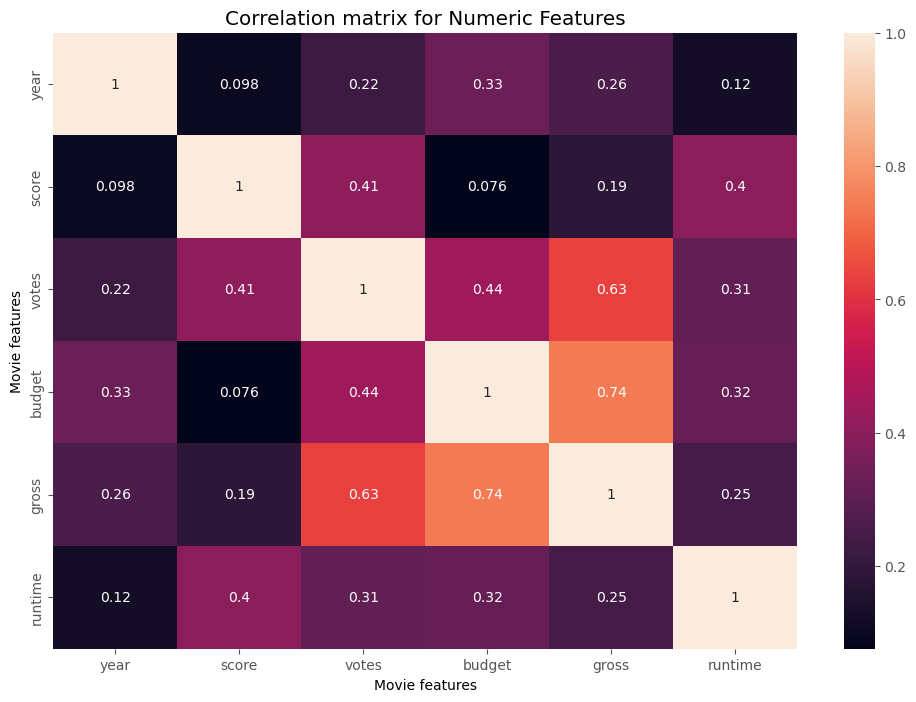

In [42]:
#votes and gross has high correlation i.e 0.51
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

#anything in black has a very low correlation

In [51]:
#we don't have company, country eetc as numeric so, we can convert them so we can include them into calculations
df_numerized=df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
       df_numerized[col_name]= df_numerized[col_name].astype('category')
       df_numerized[col_name]= df_numerized[col_name].cat.codes
df_numerized[col_name]

0        89
1        65
2        99
3        65
4        71
5       191
6        99
7        49
8        95
9       156
10       49
11      194
12       49
13      195
14       71
15      194
16      156
17       49
18       50
19       49
20       50
21       26
22       40
23       47
24      113
25       49
26      130
27       40
28       99
29       50
30      195
31       61
32       40
33       26
34       49
35      194
36      179
37      194
38       49
39      145
40      194
41       76
42      106
43       27
44      194
45       61
46       89
47      193
48      191
49      156
50      195
51      195
52       99
53       87
54       38
55      193
56      137
57       54
58       40
59      121
60      104
61       49
62       50
63       61
64      195
65       50
66       50
67       47
68      137
69       50
70       89
71      179
72      195
73       89
74       51
75      104
76      130
77       40
78      193
79      193
80      195
81       51
82      194
83  

In [54]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,89
1,The Blue Lagoon,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,65
2,Star Wars: Episode V - The Empire Strikes Back,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,99
3,Airplane!,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,65
4,Caddyshack,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,71


C:\Users\hp\AppData\Local\Temp\ipykernel_1180\1391191238.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_numerized.corr()


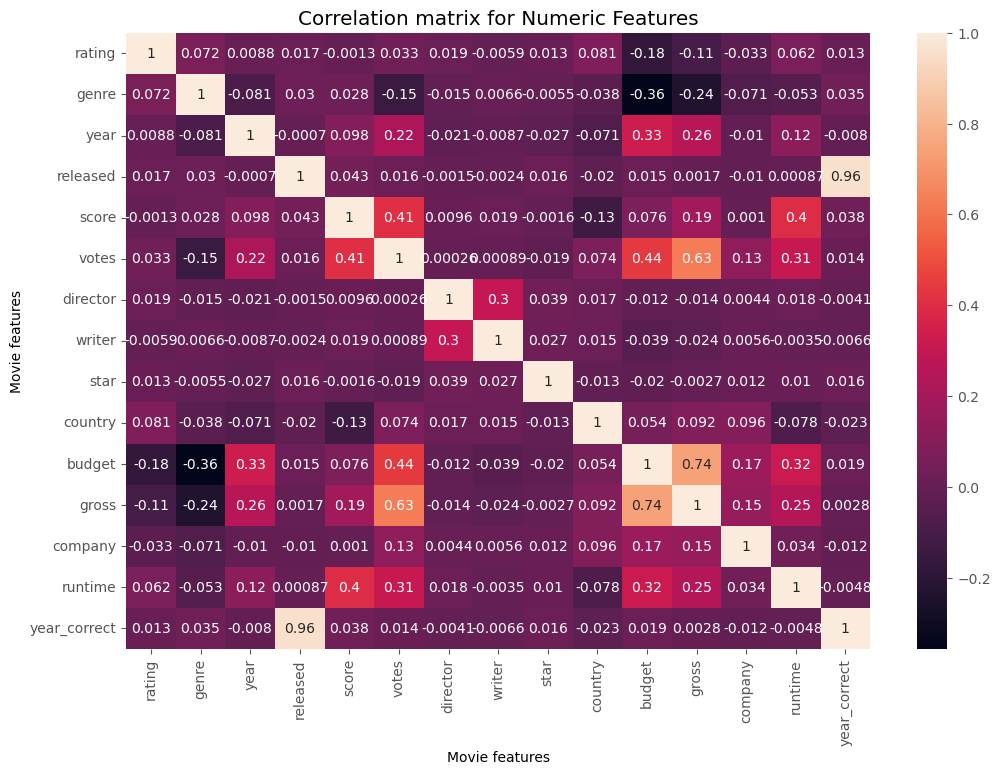

In [55]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()


In [56]:
df_numerized.corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_1180\1284351489.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_numerized.corr()


,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
rating,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145,0.013386
genre,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711,0.035257
year,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811,-0.007952
released,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868,0.962846
score,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451,0.038378
votes,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212,0.013810
director,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624,-0.004137
writer,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511,-0.006649
star,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174,0.016266
country,0.081244,-0.037615,-0.070938,-0.020427,-0.133348,0.073625,0.017490,0.015343,-0.012998,1.000000,0.054063,0.092129,0.095548,-0.078412,-0.023345


In [ ]:
#we need to organise it to see using unstack


In [58]:
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

C:\Users\hp\AppData\Local\Temp\ipykernel_1180\3211153078.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mat=df_numerized.corr()


rating        rating          1.000000
              genre           0.072423
              year            0.008779
              released        0.016613
              score          -0.001314
              votes           0.033225
              director        0.019483
              writer         -0.005921
              star            0.013405
              country         0.081244
              budget         -0.176002
              gross          -0.107339
              company        -0.032943
              runtime         0.062145
              year_correct    0.013386
genre         rating          0.072423
              genre           1.000000
              year           -0.081261
              released        0.029822
              score           0.027965
              votes          -0.145307
              director       -0.015258
              writer          0.006567
              star           -0.005477
              country        -0.037615
              budget     

In [59]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

budget        genre          -0.356564
genre         budget         -0.356564
              gross          -0.235650
gross         genre          -0.235650
budget        rating         -0.176002
rating        budget         -0.176002
genre         votes          -0.145307
votes         genre          -0.145307
country       score          -0.133348
score         country        -0.133348
rating        gross          -0.107339
gross         rating         -0.107339
year          genre          -0.081261
genre         year           -0.081261
runtime       country        -0.078412
country       runtime        -0.078412
genre         company        -0.071067
company       genre          -0.071067
year          country        -0.070938
country       year           -0.070938
genre         runtime        -0.052711
runtime       genre          -0.052711
writer        budget         -0.039451
budget        writer         -0.039451
country       genre          -0.037615
genre         country    

In [60]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes         gross           0.630757
gross         votes           0.630757
budget        gross           0.740395
gross         budget          0.740395
year_correct  released        0.962846
released      year_correct    0.962846
rating        rating          1.000000
writer        writer          1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

In [ ]:
#gross and votes has highest correlation
#company has lowest